The below code is the UNO Game project specifically for 2 players.

- The game has been created such that it adheres to OOP principles such as capturing relevant details of objects from different classes and incorporating encapsulation and inheritance as and when needed


- It also adheres to general good programming practice such as a sensible and consistent naming convention and the DRY or Don't Repeat Yourself principle to avoid repetitive blocks of code


- Classes, methods and general lines of code have been throughly annotated using docstrings and commenting


- The logic of all Special Cards (skip turn, take 2, swap direction, wild card, take 4) have been implemented as well as the house rule of swap hands


- Players cannot play invalid Cards and can draw a Card instead of playing


- The Game state is continuously saved to a pickle file in a game session and if the game session were to be exited, the same session can be loaded from the pickle file


- I have even incorporated elements that are not part of the mark scheme such as a Class diagram and Scoring functionality showing I have gone beyond the expectations and requirements


- The testing for the game can be seen as well with the outputs


# Class Diagram

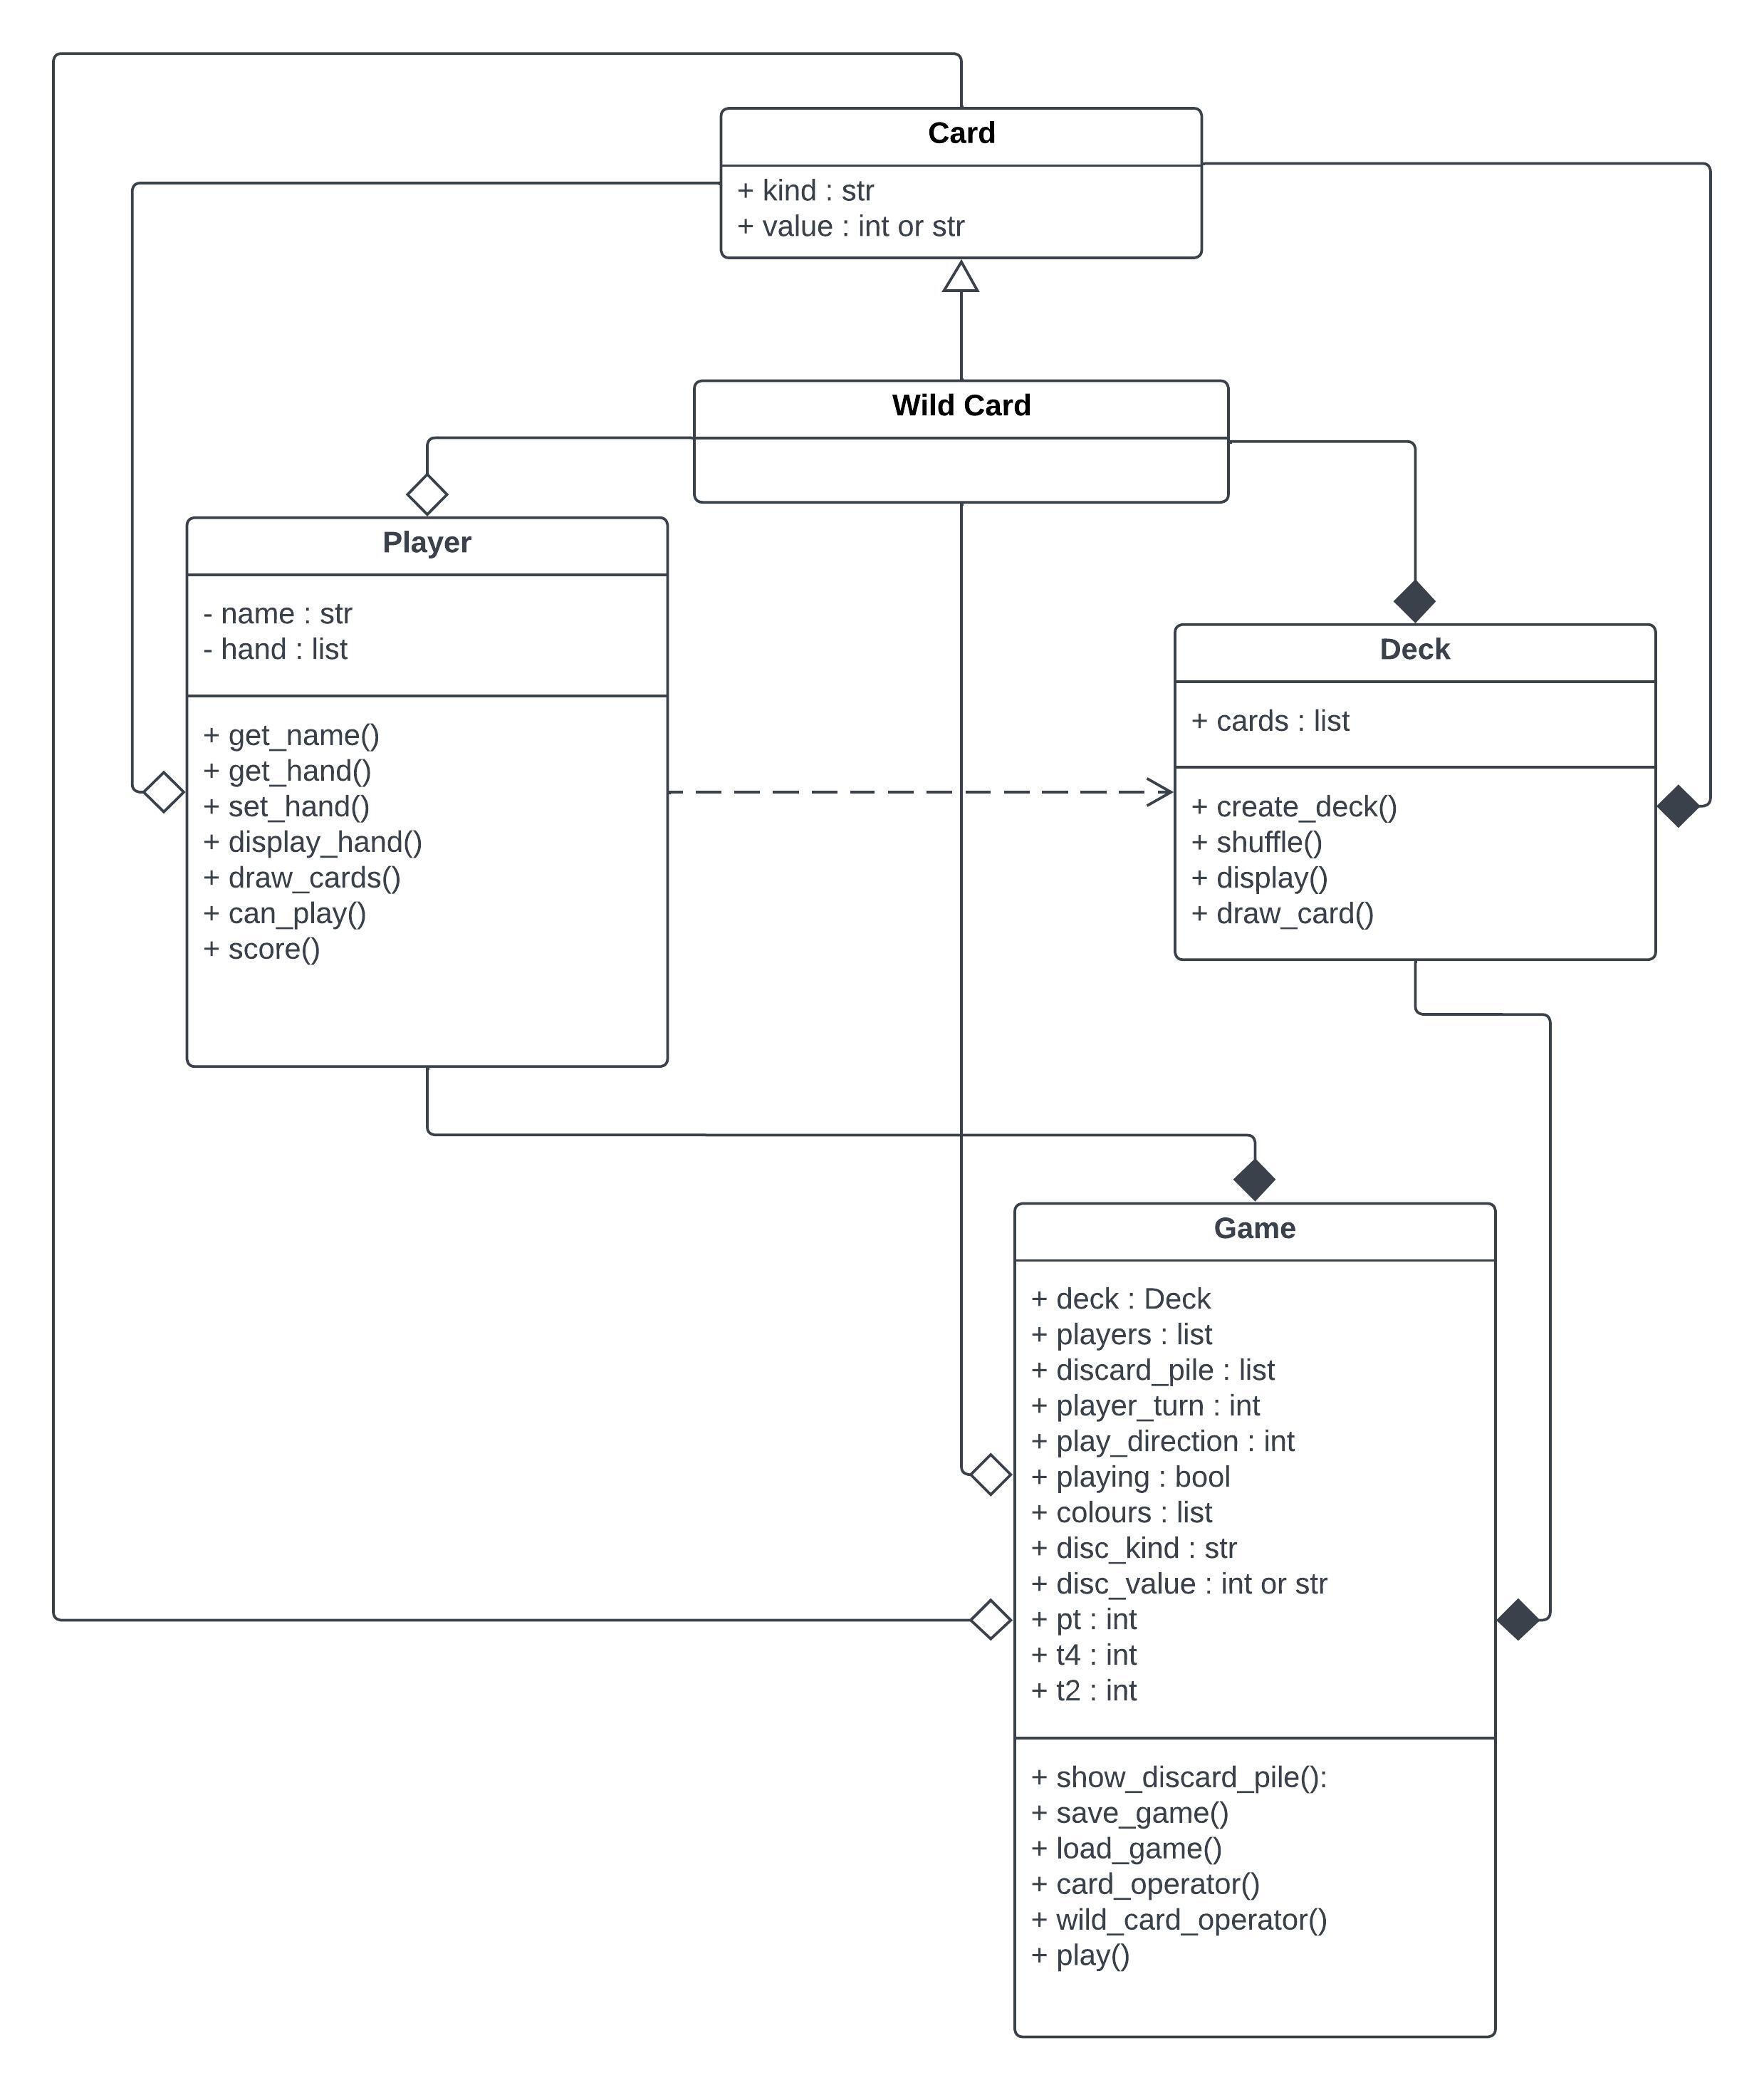

- We find all attributes and methods are public except the attributes from the Player class, which have been encapsulated.


- The Wild Card Class is a child class which inherits all attributes and methods from its parent, the Card class


- The Deck class is composed of a collection of Card and Wild Card objects. While the Card and Wild Card are distinct objects, they only exist as long as the Deck does. If there is no Deck, thre are no Cards.Therefore, the Deck Class has a composition relationship with the Card and Wild Card.


- The Player class has an aggregation relationship with the Card and Wild Card classes. If a Player object is destroyed, the Cards will still exist e.g. in the Deck or discard pile. The Player Class is also dependent on the Deck class as it draws Cards from the Deck.


- The Game Class has a composition relationship with the Player and Deck as these objects are created and managed within the Game class. If there is no Game object, there would be no Deck and Player objects. Game also has an aggregation relationship with Card and Wild Card classes as objects from these classes can exist independantly of the Game class.

# Importing Modules

In [1]:
# The random module is imported. It provides the functionality to generate random numbers, make random selections and 
# change the order of elements within a data structure like a list. This will be useful when shuffling the UNO deck
import random

# The pickle module applies serialisation to objects. Serialisation converts objects into a sequence allowing it to be 
# stored in memory allowing the state of an object to be conserved. Deserialisation coverts the sequence back into an object
# and bringing back the same state of the object it was serialised in. This will be useful when saving and loading the game.
import pickle

# Selvaraj, N. (2023) Python pickle tutorial: Object serialization, DataCamp. Available at: 
# https://www.datacamp.com/tutorial/pickle-python-tutorial

# Using ANSI codes for formatting

In [2]:
# ANSI escape code for making text bold assigned to BOLD
BOLD = '\033[1m' 

# ANSI escape code for making resetting the formatting, effectively ending any formatiing previously applied
END = '\033[0m' 

# Card Class

In [3]:
class Card:
    """
    A class used to represent a card with a colour and value for the UNO game
    
    ...
    
    Attributes
    ----------
    kind : str
        The kind of card it is
    value : int or str
        The value of the card. 
    
    Methods
    ---------- 
    
    __str__():
        Returns a string representation of the Card object
    
    """
    
    def __init__(self, kind, value):
        """
        Initlaises the attributes of the Card object
        
        Parameters
        ----------
        kind : str
            The kind of card it is (e.g. 'Blue', 'Green', 'Red', 'Yellow')
        value : int or str
            The value of the card. This can be an int if the card is a numbered card or string if the card's value is
            an action
        """

        self.kind = kind
        self.value = value
        
    def __str__(self):
        """
        Returns a string representation of the Card object
        
        Returns
        -------
        str
            string representation of the Card object
        """
        
        return "{} {}".format(self.kind, self.value)

# Wild Card (Class Inheritance)

In [4]:
# Inheritance

class WildCard(Card):
    """
    A class used to represent a Wild Card for the UNO game. This class inherits all the attributes and methods from the 
    Card class
    
    ...
    
    Attributes
    ----------
    kind : str
        The kind of card it is. This will always be 'Wild'
    value : int or str
        The value of the Wild Card. 
    
    Methods
    ---------- 
    
    __str__():
        Returns a string representation of the Wild Card object
    
    """
    
    
    def __init__(self, value):
        super().__init__('Wild', value)
        
        """
        Initlaises the attributes of the WildCard object
        
        Parameters
        ----------

        As this class deals with Wild Cards, the kind will always be 'Wild' hence there is no need to specify a kind
        parameter
        
        value : str
            This will be the value of the Wild Card where the value of the Wild Card could be 'wild_card', 'take_4' or 
            'swap_hands'
        """
        
        

# Deck Class

In [5]:
class Deck:
    """
    A class used to represent the Deck for the UNO game. 
    
    ...
    
    Attributes
    ----------
    cards : list
        An empty list to which Card objects will be appended to to create the Deck 
    
    Methods
    ---------- 
    
    create_deck():
        Appends all coloured number and action card and wild card objects to the cards attribute to form the UNO deck
    shuffle():
        Randomly changes the order of card objects within the cards attribute
    display():
        Each card object in the deck is printed
    draw_card():
        A card object is drawn and removed from the top of the cards
          
        
    
    """
    
    
    def __init__(self):
        """
        Initialises the attributes of the Deck object with the attribute cards which is an empty list and through the 
        application of methods like create_deck() and shuffle() appends all required Card objects for the UNO game to this 
        attribute and randomly changes the order of the Card objects within this attribute

        """
        self.cards = []
        self.create_deck()
        self.shuffle()
        
    def create_deck(self):
        """
        Appends all required Card objects (including coloured numbered Cards and as well as Wild Cards) to the cards 
        attribute giving all the required Cards needed to play the UNO game
        
        """
        # Create a list of strings where each string represents the colour of a suit and assign it to the colours variable
        colours = ['Blue', 'Green', 'Red', 'Yellow']
        
        # Create a list of integers from values 0 to 9 and assign it to the numbers variable. This is required as the 
        # numbered cards in each colour suit take values from 0 to 9
        numbers = list(range(0,10))
        
        # Create a list of strings where each string represents an action and assign it to the actions variable. This is 
        # required as each colour suit has cards that are action cards
        actions = ["miss_a_turn", "take_2", "change_direction"]
        
        # combine the numbers and actions lists and assign it to the variable all_vals
        all_vals = numbers + actions
        
        # The below for loop appends numbered and action cards to the cards attribute. For every suit colour, and for every 
        # number/action, we want to create a Card object using the suit colour and the number/action as the parameters and 
        # append it to the cards attribute. If the number is between a value from 1 to 9 or an action cards, then that same 
        # Card object is appended to the cards attribute again. This is because in an UNO deck, for each suit colour, there 
        # are two lots of cards for numbered cards with values from 1 to 9 and action cards hence these are appended again. 
        # Only the numbered cards with value of 0 should be appended once.
        
        for i in colours:
            for j in all_vals:
                self.cards.append(Card(i, j))
                if j in numbers[1:] or j in actions:
                    self.cards.append(Card(i, j))
                    
        # Create WildCard objects for the different WildCards and assign these to the list wild_cards
        wild_cards = [WildCard('wild_card'), WildCard('take_4'), WildCard('swap_hands')]
                    
        # The below for loop appends the required wild cards to the cards attribute. For every Wild Card within the 
        # wild_cards list, these should be appended 4 times. This is because there are 4 of each type of Wild Card within
        # an UNO deck
        for card in wild_cards:
            for k in range(4):
                self.cards.append(card)
                
        # All cards required for the UNO game will have now been appended to the cards attribute creating the UNO deck
                    
    def shuffle(self):
        """
        Applies the shuffle method from the random module to randomly rearrange the elements within the cards attribute. 
        This is required as when an UNO game, before each player is dealt their cards, the Deck must be shuffled.
        
        """
        random.shuffle(self.cards)
        
                
    def display(self):
        """
        Allows the cards within a deck to be seen. For each card within the cards attribute (i.e. the Deck), we print the
        card. As the Card objects have a string representation as defined in the Card class above, their output can be seen
        using a simple print statement
        
        """
        for c in self.cards:
            print(c)
            
            
    def draw_card(self):
        """
        Allows for for the drawing of a card from the deck. The pop method with 0 specified within it will remove the first
        element from the cards attribute, thus removing it from the Deck.
        
        Returns
        -------
        list
            Still returns the cards attribute which is a list except with the first element removed
        
        """
        return self.cards.pop(0)
    

# Player Class (Encapsulation)

In [6]:
class Player:
    """
    A class used to represent a Player for the UNO game. 
    
    ...
    
    Attributes
    ----------
    name : str
        The name of the Player
    hand : list
        The cards within the hand of the Player
    
    Methods
    ---------- 
    
    get_name():
        Returns the name attribute
    get_hand():
        returns the hand attribute
    set_hand():
        sets another hand to the hand attribute
    display_hand():
        ascribes an index to each Card in a Players hand and prints the index and Card
    draw_cards():
        A specified number of card objects can be drawn and removed from the deck and added to the Players hand
    can_play():
        Checks to see if any of the Cards in the Player's hand can be played 
    score():
        Calculates the score based on the cards in a Player's hand 

     
    
    """
    def __init__(self, name):
        """
        Initialises the attributes of the Player object with the attributes name which is a string of a Player's name 
        cards and hand which is an empty list to which Card objects will be appended to. These attributes are encapsulated.
        
        Parameters
        ----------
        name : str
            The name of the Player

        """
        
        self.__name = name
        self.__hand = []
        
    def get_name(self):
        """
        Returns
        -------
        str
            Returns the name attribute
        """
    
        return self.__name
    
    def get_hand(self):
        """
        Returns
        -------
        list
            Returns the hand attribute
        """
        return self.__hand
    
    
    def set_hand(self, hand):
        """
        sets the hand attribute
        
        """
        
        
        self.__hand = hand
    
    
    def display_hand(self):
        """
        Ascribes an index to each Card in a Players hand and prints the index and Card so that a Players Cards and the 
        position of the Cards can be viewed
        
        """
        # a print statement that has been formatted in Bold which states the Player's name and the string hand
        print("{}{}'s hand{}".format(BOLD, self.__name, END))
        
        # A string of dashes added for easy viewing
        print("---------------")
        
        # The below for loop goes through each Card in a Player's hand and prints both the index of the Card given by the
        # ind variable and the Card itself. In each run of the loop ind is increased by 1 and so this will become the index
        # of the next card. This contnues for all Cards in a players hand.
        
        # The below for loop is executed the same amount of times as there are number of cards in the hand. For each run of
        # and prints a statement in the format of the index, c,  of that colour within the colours attribute and adding 1 
        # to this(adding 1 is necessary as Python uses zero indexing whereas a human player would expect indexing to begin 
        # from 1 hence the need to add 1) as well as the Card itself (based on the index of the Card in the hand attribute) 
    
        for c in range(len(self.__hand)):
            print("{}. {}".format(c+1, self.__hand[c]))
    
        
    def draw_cards(self, deck, num_cards):
        """
        Appends all required Card objects (including coloured numbered Cards and as well as Wild Cards) to the cards 
        attribute giving all the required Cards needed to play the UNO game
        
        Parameters
        ----------
        deck : Deck object
            A deck object which will be an instance of the Deck() class
        num_cards : int
            The number of cards that need to be drawn from the deck
        
        """
        
        # The below for loop appends the required cards drawn from the deck to the hand attribute. The for loop is executed
        # for the number of cards that need to be drawn from the deck. In each run through the loop, a card is drawn and
        # consequently removed from the deck and this card is assigned to the card variable. This same card is appended
        # to hand attribute.
        for i in range(num_cards):
            card = deck.draw_card()
            self.__hand.append(card)
            
    
    def can_play(self, kind, value, player_hand):
        """
        Checks to see if any of the Cards in the Player's hand can be played based on the kind of the card (i.e. colour, 
        wild) and the value of the card (i.e. its number or action)
        
        Parameters
        ----------
        kind : str
            This will be the kind attribute of the Card object that is last element of the discard pile
        value : int or str
            This will be the value attribute of the Card object that is last element of the discard pile
        player_hand : list
            This will be the hand attribute of the Player object of the Current Player
        
        Returns
        -------
        bool
            True if any of the Cards in the Players hand satisfied the conditions. False otherwise
        """
        
        # The below for loop goes through each Card in a Players hand and checks if the Card's kind (i.e. Blue, Green, 
        # Red, Yellow or Wild) is the same as the kind of the Card object of the last element of the discard pile. Of even 
        # one Card object of the Players hand satisfies then condition, then True will be returned. Otherwise it will  
        # return False
        for card in player_hand:
            if card.kind == "Wild" or card.kind == kind or card.value == value: 
                return True
        return False
    
    def score(self):
        """
        Calculates the total value of all cards in a PLayer's hand
        
        Returns
        -------
        int
            The score which is the total value of all cards
        """
        
        # the socre variable is initialised and set the value 0
        score = 0
        
        # The below for loop goes through each Card in a Players hand and checks for multiple conditions. if the value 
        # attribute of the Card is miss_a_turn, take_2, change_direction i.e. if it is an action card the score increases 
        # by 20 points. otherwise, if the kind of Card is a Wild Card, the score increases by 50 points. Otherwise, the Card
        # must be a numbered Card and the score should increase by the value of the number of that Card. After all the Cards
        # are looped, the total score is then returned
        for card in self.__hand:
            if card.value in ["miss_a_turn", "take_2", "change_direction"]:
                score = score + 20
            elif "Wild" in card.kind:
                score = score + 50
            else:
                score = score + int(card.value)
        return score
        

            

# Game Class

In [7]:
class Game:
    """
    A class used to play the UNO game. This game has been created with only 2 players in mind so has been coded accordingly
    
    ...
    
    Attributes
    ----------
    deck : Deck
        The Deck object representing the UNO deck of Cards
    players : list
        A list containing two Player objects 
    discard_pile : list
        A list of Cards that is appended to after a Players has played their cards
    player_turn : int
        An integer that determines which the turn of the player
    play_direction : int
        An integer that determines direction of play
    playing : bool
        The game only takes place while this is True. If this is False, the game is over or the game has been exited.
    colours : list
        A list of strings of all the suit colours
    disc_kind : str
        The kind attribute of the Card object that is the last element of the discard pile
    disc_value : int or str
        The value attribute of the Card object that is the last element of the discard pile
    pt : int
        Used as a switch when a miss_a_turn or change_direction is played
    t4 : int
        Used as a switch when a Wild take_4 Card is played
    t2 : int
        Used as a switch when a take_2 Card is played
        
        
        
    Methods
    ---------- 
    
    show_discard_pile():
        Prints all the cards in the discard pile
    save_game():
        Saves the current state of the Game object as a pickle file 
    load_game():
        loads a previous state of a Game's object from the pickle file 
    card_operator():
        A repetitive block of code that is executed when numbered or action cards are played
    wild_card_operator():
        A repetitive block of code that is executed when Wild Cards are played
    play():
        Handles the logic of the UNO game
    swap_hands():
        Swaps each Player's hand with each other
    

    """
    def __init__(self):
        self.deck = Deck()
        self.players = [Player("Player 1"), Player("Player 2")]
        self.players[0].draw_cards(self.deck, 7)
        self.players[1].draw_cards(self.deck, 7)
        self.discard_pile = [self.deck.draw_card()]
        self.player_turn = 0
        self.play_direction = 1
        self.playing = True
        self.colours = ['Blue', 'Green', 'Red', 'Yellow']
        self.disc_kind = self.discard_pile[-1].kind
        self.disc_value = self.discard_pile[-1].value
        self.pt = -1
        self.t4 = 0
        self.t2 = 0
        
        
    def show_discard_pile(self):
        """
        Prints each discarded Card that is in the Discard Pile

        """
        
        print("Discard pile:")
        print("")
        for disc in self.discard_pile:
            print(disc)

    def save_game(self, file_name='UNOsave.pickle'):
        """
        Saves the Game object to a pickle file
        
        Parameters
        ----------
        file_name : str (optional)
            The name of the pickle file to which the Game object is to be saved. The default is set to 'UNOsave.pickle' so
            if the file_name parameter isn't specified, the Game object will be saved to 'UNOsave.pickle'.

        """
        
        # The with keyword will automatically close the pickle file after the code within the with statement has been 
        # executed. This is good practice as it ensures that the file is closed after it is no longer needed and frees
        # computational resources. The pickle file given by the file_name parameter is opened in 'wb' or write binary mode
        # and assigned to the variable f. This is because we want to write pickled data where the pickled data is binary.
        # .dump writes the pickled object to the file object f
        
        # Mastromatteo, D.The Python pickle Module: How to Persist Objects in Python – Real Python. 
        # Available at: https://realpython.com/python-pickle-module/.
        
        with open(file_name, 'wb') as f:
            pickle.dump(self, f)
            
    def load_game(self, file_name='UNOsave.pickle'):
        """
        Loads a previous state of a game object allowing for the Game to continue from where it was left off
        
        Parameters
        ----------
        file_name : str (optional)
            The name of the pickle file to which the Game object is to be recreated from. The default is set to 
            'UNOsave.pickle' so if the file_name parameter isn't specified, the Game object will be recreated from  
            'UNOsave.pickle'.

        """
        
        
        # The pickle file given by the file_name parameter is opened in 'rb' or read binary mode and assigned to the 
        # variable f. pickl.load is then applied to f, esentially deserialisng the pickle file and this result is assigned 
        # to the variable loaded_game effectively recreating the Game object. The attributes from the loaded Game object
        # is then assigned to the same attributes of the current Game object.
        with open(file_name, 'rb') as f:
            loaded_game = pickle.load(f)
                        
            self.deck = loaded_game.deck
            self.players = loaded_game.players
            self.discard_pile = loaded_game.discard_pile
            self.player_turn = loaded_game.player_turn
            self.play_direction = loaded_game.play_direction
            self.playing = loaded_game.playing
            self.colours = loaded_game.colours
            self.disc_kind = loaded_game.disc_kind
            self.disc_value = loaded_game.disc_value
            self.pt = loaded_game.pt
            self.t4 = loaded_game.t4
            self.t2 = loaded_game.t2
            self.current_player = loaded_game.current_player
            
    def card_operator(self):
        """
        A repetitive block of code that is executed when numbered or action cards are played

        """
        
        # A print statement for an empty line to allow for easy readability
        print("")
        
        # A print statement to show the exact Card the current_player has played
        print("You played {}".format(self.current_player.get_hand()[self.card_chosen-1]))
        
        # The Card played by the player is removed from their hand using .pop and this card is appended to discard_pile
        self.discard_pile.append(self.current_player.get_hand().pop(self.card_chosen-1))
        
        # disc_kind, will be assigned the kind attribute of the Card that was just played by the Current Player and was 
        # appended to the discard pile
        self.disc_kind = self.discard_pile[-1].kind
        
        # disc_value, will be assigned the value attribute of the Card that was just played by the Current Player and 
        # was appended to the discard pile
        self.disc_value = self.discard_pile[-1].value

            
    def wild_card_operator(self):
        """
        A repetitive block of code that is executed when Wild Cards are played

        """
        # The below for loop is executed the same amount of times as there are colours in the colours attribute and prints 
        # a statement in the format of the index, col, of that colour within the colours attribute and adding 1 (adding 1 
        # is necessary as Python uses zero indexing whereas a human player would expect indexing to begin from 1 hence the 
        # need to add 1) as well as the colour itself (based on the index of the colour in the colours attribute) 
        for col in range(len(self.colours)):
            print("{}. {}".format(col+1, self.colours[col]))
            
        # The Player is promted to input a colour based on the index seen next to the colour from the above for loop
        self.new_colour = int(input("Select a colour"))

        # A print statement for an empty line to allow for easy readability
        print("")
        
        # A print statement to show the exact Card the current_player has played
        print("You played {}".format(self.current_player.get_hand()[self.card_chosen-1]))
        
        # The Card played by the player is removed from their hand using .pop and this card is appended to discard_pile
        self.discard_pile.append(self.current_player.get_hand().pop(self.card_chosen-1))
        
        # disc_kind, will be assigned the colour that the Player selects based on the index chosen. In order to correctly 
        # align with Pythons zero indexing, 1 is subtracted from the value chosen by the player. This allows the Player to
        # change the colour of the Deck.
        self.disc_kind = self.colours[self.new_colour-1]
        
        # disc_value, will be assigned the value attribute of the Wild Card that was just played by the Current Player and 
        # was appended to the discard pile.
        self.disc_value = self.discard_pile[-1].value
        
        # This print statement will show what the new deck colour is
        print('new deck colour is: {}'.format(self.disc_kind))        
        
    def swap_hands(self):
        """
        Swaps each Player's hand with eachother

        """
        # the hand of Player 1 is assigned to the variable h. 
        h = self.players[0].get_hand()
        
        # the hand of Player 1 is set to the hand of Player 2 using .set_hand() and get_hand() methods
        self.players[0].set_hand(self.players[1].get_hand())
        
        # # the hand of Player 2 is set to the the variable h where h is the hand of Player 1 before it was set to the 
        # hand of Player 2
        self.players[1].set_hand(h)
          
            
    def play(self): 
        """
        Starts the UNO game and handles the game logic
    

        """
        
        # The below while loop handles the logic of the entire game. The game will continue to run so long as the playing
        # attribute is True
        while self.playing:
            
            # Saves the current state of the Game object to a pickle file
            self.save_game()
            
            # Prints the Card object which is the last element of discard_pile. This is essentially the Card that is on top
            # of the discard pile
            print('Card on top of discard pile: {}'.format(self.discard_pile[-1]))
            print("")
            
            # The current player is determined by indexing the players attribute using the player_turn attribute. 
            # If player_turn = 0, the current_player is Player 1 and if player_turn = 1, the current player is Player 2
            self.current_player = self.players[self.player_turn]
            
            # Shows the hand of the current player
            self.current_player.display_hand()

            # If the current player can play any cards in their hand as determined using the can_play() method. They will
            # be presented with 3 choices: Play a Card, Draw a Card and Exit Game
            if self.current_player.can_play(self.disc_kind, self.disc_value, self.current_player.get_hand()):
                print("")
                print('1. Play a Card')
                print('2. Draw a Card')
                print('3. Exit Game')
                print("")
                
                # The current player will be prompted to enter a number corresponding to the three choices. This is
                # assigned to the choice variable
                choice = int(input('Play or Draw or Exit?'))
                
                # If the number entered is not equal to 1, 2 or 3, the Player will be told their input is invalid and will
                # be prompted to enter the number again
                while choice != 1 and choice !=2 and choice !=3:
                    choice = int(input('Invalid input. Play or Draw or Exit?'))
                
                # If the current player's choice is 1, they have decided to play a Card
                if choice == 1:
                
                
                    # The current player will be prompted to enter an integer number corresponding to the index of the Card
                    # they want to play from their hand. This will be assigned to the card_chosen attribute
                    self.card_chosen = int(input("Which card do you want to play? "))
                    
                    # while the specific card chosen by the current player from their hand (as given by [self.current_player.
                    # .get_hand()[self.card_chosen-1]]) is not playable as determined by .can_play(), the current player will
                    # be told their input is invalid and will be prompted to enter another integer number for another Card.
                    while not self.current_player.can_play(self.disc_kind, self.disc_value, [self.current_player.get_hand()[self.card_chosen-1]]):
                        self.card_chosen = int(input("Invalid card. Which card do you want to play? "))

                    # if the Card that the current player plays is a Wild wild_card, the wild_card_operator() will be
                    # executed
                    if self.current_player.get_hand()[self.card_chosen-1].kind == 'Wild' and self.current_player.get_hand()[self.card_chosen-1].value == 'wild_card':
                        self.wild_card_operator()

                    # if the Card that the current player plays is a Wild take_4 card, the wild_card_operator() will be
                    # executed and the t4 attribute will be assigned the value 1
                    elif self.current_player.get_hand()[self.card_chosen-1].kind == 'Wild' and self.current_player.get_hand()[self.card_chosen-1].value == 'take_4':
                        self.wild_card_operator()

                        self.t4 = 1
                        
                    # if the Card that the current player plays is a Wild swap_hands card, the wild_card_operator() will be
                    # executed and if the current player is Player 1, then Player 2's hand is assigned to Player 1 and
                    # vice versa
                    elif self.current_player.get_hand()[self.card_chosen-1].kind == 'Wild' and self.current_player.get_hand()[self.card_chosen-1].value == 'swap_hands':
                        self.wild_card_operator()
                        self.swap_hands()

            
                    # In an UNO game with 2 Players, miss_a_turn and change_direction do exactly the same 
                    # thing and cause the current player to play again. If the Card that the current player plays is a 
                    # miss_a_turn or change_direction. if the current player is Player 1, the attribute pt is assigned the 
                    # value 0 (where 0 is the index for Player 1 within the Players attribute) else the Player is Player 2 
                    # and the attribute pt will be assigned the value 1 (where 1 is the index for Player 2 within the 
                    # Players attribute) () After this the card_operator() is executed. The logic for the use of pt will be
                    # told below
                    elif self.current_player.get_hand()[self.card_chosen-1].value == 'miss_a_turn' or self.current_player.get_hand()[self.card_chosen-1].value == 'change_direction':
                        if self.current_player == self.players[0]:
                            self.pt = 0
                        else:
                            self.pt = 1

                        self.card_operator()
                        
                    # if the Card that the current player plays is a take_2 Card the card_operator() will be executed and 
                    # the t2 attribute will be assigned the value 1# The logic for the use of t2 will be told below.
                    elif self.current_player.get_hand()[self.card_chosen-1].value == "take_2":
                        self.card_operator()
                        self.t2 = 1
                        
                        
                    # if the Card that the current player plays is a standard numbered Card, the card_operator() will be
                    # applied 
                    else:
                        self.card_operator()
                        
                        
                        
                    # All the different kinds of Cards have been covered in the if-elif-else statements above      
                    
                # If the current player's choice is 2, they have decided to Draw a Card. A single Card is drawn and removed
                # from the Deck and appended to the current players Hand
                elif choice == 2:
                    print("You drew a Card")
                    self.current_player.draw_cards(self.deck, 1)
                    
                # If the current player's choice is 3, they have decided to Exit the Game. The playing loop will be 
                # assigned the boolean False, ending the Playing while loop and thus the Game and a print statement will be
                # printed
                elif choice == 3:
                    self.playing = False
                    print("Game saved. Thanks for playing. Goodbye!")
                    
              
            
            # If the current player cannot play any Cards in their hand as determined using the can_play() method above. 
            # They will be told 'You cannot play. Draw a card.' by a print statement and a single Card is drawn and removed
            # from the Deck and appended to the current players Hand
            else:
                print("")
                print("You cannot play. Draw a card.")
                print("")
                self.current_player.draw_cards(self.deck, 1)
                print("")
                
                
                
                
            # If, after playing a Card, the current player's Hand only has 1 Card left 
            # (i.e. len(self.current_player.get_hand()) == 1), they will call UNO
            if len(self.current_player.get_hand()) == 1:
                print("")
                print("{}{} calls UNO{}".format(BOLD, self.current_player.get_name(), END))
                print("")
                
                
            # If after playing a Card, the current player's Hand only has no Cards left , the playing 
            # loop will be assigned the boolean False, ending the Playing while loop and thus the Game and the current
            # player will be told they have won. If the current player is Player 1, then the score printed to Player 1 
            # will be the value of Cards in Player 2's hand otherwise the current player must be Player 2 and the score 
            # printed to Player 2 will be the value of Cards in Player 1's hand
            elif len(self.current_player.get_hand()) == 0:
                self.playing = False
                print("")
                print("Game Over")
                print("{} is the Winner!".format(self.current_player.get_name()))
                if self.current_player == self.players[0]:
                    print("{}'s score is: {}".format(self.current_player.get_name(), self.players[1].score()))
                else:
                    print("{}'s score is: {}".format(self.current_player.get_name(), self.players[0].score()))
            
            
            
            # The logic of the pt attribute is applied here. The pt attribute is used to handle the miss_a_turn, 
            # change_direction and the player turn logic and has a defualt value of -1. player_turn is the index of the 
            # player determining whcih Player plays, where 0 is for Player 1 and 1 for Player 2. if pt is 0, then 
            # player_turn is 0 which corresponds to Player 1 playing again. If pt is 1 then player_turn is 1 which 
            # corresponds to Player 2 playing again. If pt is its default value of -1, then player_turn will simply be 
            # increased by play_direction allowing the next Player to play. As there are only 2 players, that are 
            # represented by indexes 0 and 1, player_turn cannot be higher than 1. Therefore, if after Player 2 Plays a
            # Card
            if self.pt == 0:
                self.player_turn= 0
            elif self.pt == 1:
                self.player_turn = 1
            elif self.pt == -1:
                self.player_turn = self.player_turn + self.play_direction
                if self.player_turn >= 2:
                    self.player_turn = 0
            
            # The pt attribute is assigned its default value of -1 allowing the pt logic to be implemented each time a 
            # miss_a_turn or change_direction is played.
            self.pt = -1
            
            # After determining the next player's turn as given by the player_turn attribute above. The current player
            # attribute becomes updated using the player_turn attribute and the next player becomes the current player.
            self.current_player = self.players[self.player_turn]
            
            # The logic of the t4 attribute is applied here. If the t4 attribute is 1, then the current player must draw
            # 4 cards before playing their Card. The t4 attribute is assigned its default value of 0 again allowing the t4 
            # logic to be implemented each time a Wild take_4 Card is played.
            if self.t4 == 1:
                self.current_player.draw_cards(self.deck, 4)
                self.t4 = 0
                
            # The logic of the t2 attribute is applied here. If the t2 attribute is 1, then the current player must draw
            # 2 cards before playing their Card. The t2 attribute is assigned its default value of 0 again allowing the t2 
            # logic to be implemented each time a take_2 Card is played.
            if self.t2 == 1:
                self.current_player.draw_cards(self.deck, 2)
                self.t2 = 0

# Testing

## Testing the same colour logic

In [12]:
game = Game()
game.play()

Card on top of discard pile: Red 9

Player 1's hand
---------------
1. Red 5
2. Green 4
3. Yellow 7
4. Wild wild_card
5. Blue 4
6. Green miss_a_turn
7. Blue 8

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 2
Invalid card. Which card do you want to play? 1

You played Red 5
Card on top of discard pile: Red 5

Player 2's hand
---------------
1. Red change_direction
2. Green 3
3. Red 4
4. Green 9
5. Yellow 8
6. Green change_direction
7. Blue 9

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?3
Game saved. Thanks for playing. Goodbye!


As can be seen in this test, we find Player 1 tried to attempt playing the Green 4 Card but was correctly told that this Card is invalid and was promted to Play another Card. Player 1 was allowed to play Red 5 Card however as this matches the colour of the Deck. This shows the same colour logic is working correctly.

## Testing the same number logic

In [16]:
game = Game()
game.play()

Card on top of discard pile: Yellow 6

Player 1's hand
---------------
1. Blue 4
2. Blue 6
3. Blue 2
4. Wild take_4
5. Wild swap_hands
6. Yellow 3
7. Yellow miss_a_turn

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 1
Invalid card. Which card do you want to play? 2

You played Blue 6
Card on top of discard pile: Blue 6

Player 2's hand
---------------
1. Wild wild_card
2. Red 7
3. Red 2
4. Red change_direction
5. Wild wild_card
6. Wild wild_card
7. Blue 9

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?3
Game saved. Thanks for playing. Goodbye!


As can be seen in this test, we find Player 1 tried to attempt playing the Blue 4 Card but was correctly told that this Card is invalid and was promted to Play another Card. Player 1 was allowed to play Blue 6 Card however despite the Card on top of the discard pile being Yellow 6 as the number on both Cards are the same.

## Testing the draw card functionality

In [12]:
game = Game()
game.play()

Card on top of discard pile: Green 6

Player 1's hand
---------------
1. Wild take_4
2. Yellow take_2
3. Yellow 8
4. Red 7
5. Green miss_a_turn
6. Green 6
7. Red take_2

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?2
You drew a Card
Card on top of discard pile: Green 6

Player 2's hand
---------------
1. Yellow change_direction
2. Blue 6
3. Green 7
4. Yellow 3
5. Wild wild_card
6. Red 1
7. Wild swap_hands

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 3

You played Green 7
Card on top of discard pile: Green 7

Player 1's hand
---------------
1. Wild take_4
2. Yellow take_2
3. Yellow 8
4. Red 7
5. Green miss_a_turn
6. Green 6
7. Red take_2
8. Yellow 2

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?3
Game saved. Thanks for playing. Goodbye!


In this test, we find that Player 1 starts with 7 cards and decides to draw a card. On Player 1's next turn, there are now 8 cards in their hand showing that a card as successfully been drawn from the deck and added Player 1's hand. This shows the draw card functionality is working correctly

## Testing the change direction logic

In [17]:
game = Game()
game.play()

Card on top of discard pile: Green 3

Player 1's hand
---------------
1. Yellow take_2
2. Green change_direction
3. Blue 5
4. Green 2
5. Blue 4
6. Red miss_a_turn
7. Wild take_4

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 4

You played Green 2
Card on top of discard pile: Green 2

Player 2's hand
---------------
1. Blue change_direction
2. Yellow 7
3. Wild swap_hands
4. Green 4
5. Wild wild_card
6. Wild swap_hands
7. Wild swap_hands

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 4

You played Green 4
Card on top of discard pile: Green 4

Player 1's hand
---------------
1. Yellow take_2
2. Green change_direction
3. Blue 5
4. Blue 4
5. Red miss_a_turn
6. Wild take_4

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 2

You played Green change_direction
Card on top of discard pile: Green change_direction

Player 1's hand
------------

As can be seen in this test, we find when Player 1 played the Green change_direction Card, Player 1 was still able to play in the next turn. This is what should happen as in a 2 player UNO game, change_direction would mean the current player gets to play again which is what we find above.

## Testing the miss a turn logic

In [19]:
game = Game()
game.play()

Card on top of discard pile: Green 5

Player 1's hand
---------------
1. Green miss_a_turn
2. Green 2
3. Wild wild_card
4. Yellow 6
5. Red 1
6. Red 7
7. Blue 4

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 2

You played Green 2
Card on top of discard pile: Green 2

Player 2's hand
---------------
1. Green 6
2. Green 5
3. Red 1
4. Red 2
5. Yellow 7
6. Red 3
7. Red 7

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 1

You played Green 6
Card on top of discard pile: Green 6

Player 1's hand
---------------
1. Green miss_a_turn
2. Wild wild_card
3. Yellow 6
4. Red 1
5. Red 7
6. Blue 4

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 1

You played Green miss_a_turn
Card on top of discard pile: Green miss_a_turn

Player 1's hand
---------------
1. Wild wild_card
2. Yellow 6
3. Red 1
4. Red 7
5. Blue 4

1. Play a Card
2. Draw a Card
3. Exi

As can be seen in this test, we find when Player 1 played the Green miss_a_turn, Player 1 was still able to play in the next turn. This is what should happen as in a 2 player UNO game, Green miss_a_turn would mean the current player gets to play again which is what we find above.

## Testing the take 2 logic

In [23]:
game = Game()
game.play()

Card on top of discard pile: Red 4

Player 1's hand
---------------
1. Yellow 0
2. Blue 3
3. Blue 1
4. Yellow 9
5. Red take_2
6. Blue 3
7. Wild swap_hands

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 5

You played Red take_2
Card on top of discard pile: Red take_2

Player 2's hand
---------------
1. Wild swap_hands
2. Yellow 5
3. Blue 9
4. Wild swap_hands
5. Red 1
6. Yellow 8
7. Blue 1
8. Green 6
9. Green 4

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?3
Game saved. Thanks for playing. Goodbye!


As can be seen in this test, we find when Player 1 played the Red take_2, Player 2's hand increases from 7 cards to 9 cards. This shows that the take 2 logic is working correctly.

## Testing the Wild take 4 logic

In [8]:
game = Game()
game.play()

Card on top of discard pile: Blue 6

Player 1's hand
---------------
1. Yellow miss_a_turn
2. Blue take_2
3. Green 1
4. Blue 4
5. Red 5
6. Green 7
7. Red 2

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 4

You played Blue 4
Card on top of discard pile: Blue 4

Player 2's hand
---------------
1. Blue 7
2. Yellow 1
3. Wild take_4
4. Red 6
5. Yellow 4
6. Blue miss_a_turn
7. Blue 5

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 3
1. Blue
2. Green
3. Red
4. Yellow
Select a colour3

You played Wild take_4
new deck colour is: Red
Card on top of discard pile: Wild take_4

Player 1's hand
---------------
1. Yellow miss_a_turn
2. Blue take_2
3. Green 1
4. Red 5
5. Green 7
6. Red 2
7. Red 7
8. Green 3
9. Green change_direction
10. Wild wild_card

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 3
Invalid card. Which card do you want to play? 1

As can be seen in this test, we find when Player 2 Plays the Wild take 4 card and changes the deck colour to Red, Player 1's hand immediately after shows that 4 Cards have been added to their hand since their last turn. Furthermore, Player 1 tries to Play a Green 1 and Yellow miss_a_turn Card but is told that these are invalid. This is because the colours of these Cards do not match the new colour of the Deck. Player 1 then plays the Red 4 Card and this is allowed to b played as it matches the new deck colour. This shows that the Wild take_4 logic is working correctly.

## Testing the Wild wild card logic

In [9]:
game = Game()
game.play()

Card on top of discard pile: Green change_direction

Player 1's hand
---------------
1. Green 2
2. Blue 9
3. Blue 7
4. Yellow 4
5. Green change_direction
6. Wild wild_card
7. Green 7

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 6
1. Blue
2. Green
3. Red
4. Yellow
Select a colour1

You played Wild wild_card
new deck colour is: Blue
Card on top of discard pile: Wild wild_card

Player 2's hand
---------------
1. Red 6
2. Yellow take_2
3. Blue 5
4. Yellow miss_a_turn
5. Yellow miss_a_turn
6. Yellow 7
7. Green 1

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 1
Invalid card. Which card do you want to play? 3

You played Blue 5
Card on top of discard pile: Blue 5

Player 1's hand
---------------
1. Green 2
2. Blue 9
3. Blue 7
4. Yellow 4
5. Green change_direction
6. Green 7

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?3
Game saved. Thanks for playing. Goodbye!


As can be seen in this test, we find when Player 1 Plays the Wild wild card and changes the deck colour to Blue. Player 2 a Red 6 Card but is told that this are invalid. This is because the colour does not match the new colour of the Deck. Player 2 then plays the Blue 5 Card and this is allowed to b played as it matches the new deck colour. This shows that the Wild wild card logic is working correctly.

## Testing the Wild swap hands logic

In [11]:
game = Game()
game.play()

Card on top of discard pile: Blue 2

Player 1's hand
---------------
1. Wild wild_card
2. Wild swap_hands
3. Yellow miss_a_turn
4. Blue 7
5. Green 9
6. Wild wild_card
7. Yellow 9

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 4

You played Blue 7
Card on top of discard pile: Blue 7

Player 2's hand
---------------
1. Blue 6
2. Blue 2
3. Green 3
4. Red 1
5. Blue take_2
6. Yellow 8
7. Yellow take_2

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 1

You played Blue 6
Card on top of discard pile: Blue 6

Player 1's hand
---------------
1. Wild wild_card
2. Wild swap_hands
3. Yellow miss_a_turn
4. Green 9
5. Wild wild_card
6. Yellow 9

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 2
1. Blue
2. Green
3. Red
4. Yellow
Select a colour4

You played Wild swap_hands
new deck colour is: Yellow
Card on top of discard pile: Wild swap_hands

Pla

As can be seen in this test, we find after Player 1 plays the Wild swap card and changes the deck colour to Yellow, Player 2's hand becomes Player 1's hand and vice versa. This shows that the Wild swap hands logic is working correctly.

## Testing the saving and loading functionality

### Saving the game

In [23]:
game = Game()
game.play()

Card on top of discard pile: Blue change_direction

Player 1's hand
---------------
1. Wild wild_card
2. Yellow 4
3. Yellow 3
4. Blue change_direction
5. Blue 1
6. Green miss_a_turn
7. Blue 0

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 5

You played Blue 1
Card on top of discard pile: Blue 1

Player 2's hand
---------------
1. Yellow 7
2. Wild take_4
3. Green 6
4. Yellow 4
5. Red 2
6. Yellow 6
7. Blue 7

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?3
Game saved. Thanks for playing. Goodbye!


### Loading the game

In [24]:
game = Game()
game.load_game()
game.play()

Card on top of discard pile: Blue 1

Player 2's hand
---------------
1. Yellow 7
2. Wild take_4
3. Green 6
4. Yellow 4
5. Red 2
6. Yellow 6
7. Blue 7

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 7

You played Blue 7
Card on top of discard pile: Blue 7

Player 1's hand
---------------
1. Wild wild_card
2. Yellow 4
3. Yellow 3
4. Blue change_direction
5. Green miss_a_turn
6. Blue 0

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?3
Game saved. Thanks for playing. Goodbye!


In this test, an instance of the Game is played and the Game is exited on Player 2's turn with the state of the Game being saved. After the Game is loaded, we find that it is still Player 2's turn and that their hand is exactly the same as before loading. The Game continues from this state with Player 2 playing the Blue 7 card and Player 1 about to Play. We find even Player 1's hand is the same as before the loading. This shows that the saving and loading functionality is working correctly.

## Testing playing a Game until finish

- Checking for cases where the Player cannot play
- testing for the UNO call
- testing for the Game ending
- Testing for the scoring functionality

In [25]:
game = Game()
game.load_game()
game.play()

Card on top of discard pile: Blue 7

Player 1's hand
---------------
1. Wild wild_card
2. Yellow 4
3. Yellow 3
4. Blue change_direction
5. Green miss_a_turn
6. Blue 0

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 4

You played Blue change_direction
Card on top of discard pile: Blue change_direction

Player 1's hand
---------------
1. Wild wild_card
2. Yellow 4
3. Yellow 3
4. Green miss_a_turn
5. Blue 0

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 1
1. Blue
2. Green
3. Red
4. Yellow
Select a colour4

You played Wild wild_card
new deck colour is: Yellow
Card on top of discard pile: Wild wild_card

Player 2's hand
---------------
1. Yellow 7
2. Wild take_4
3. Green 6
4. Yellow 4
5. Red 2
6. Yellow 6

1. Play a Card
2. Draw a Card
3. Exit Game

Play or Draw or Exit?1
Which card do you want to play? 1

You played Yellow 7
Card on top of discard pile: Yellow 7

Player 1's hand
-------

- In the above Game session, we can see that the logic of the Game works very well as we have seen in the testing above.


- We find in the middle of the Game where the Card on top of discard pile is Yellow 6 and Player 1's hand only contains Green miss_a_turn and Blue 0 Cards. As neither of these Cards have the same colour or value as Yellow 6, Player 1 is rightly told that they cannot play and must draw a card. This shows that the cannot play logic is working correctly.


- We find towards the end of the Game that after Player 1 plays the Blue miss_a_turn. They will only have 1 card in their hand and therfore should call UNO. This is what we find here showing that the call UNO logic is working correctly.


- We also find at the end of the Game that when Player 1 plays their final Card, Blue 0, they have no Cards in their hand and have won the Game. At this point the Game should end. This is what we see in this Game where The Game ends, and Player 1 is announced as the Winner.


- Player 1's score is also printed. This will be the value of the Cards in Player 2's hand. As Player 2 had the Wild take_4 and Red 2 crds in their hand whose value amounts to a score of 52, we find that this same score is attributed to Player 1. This shows that the scoring functionality is working correctly